# Check ICA
The main purpose of the code in this notebook is to identify noise components in the ICA solutions generated in 'run_ica.py'


- Laura: 0108 + 0110
- Aleks: 0109 + 0111
- Luke: 0112 + 0113
- Pernille: 0114
- Christoffer: 0115

In [1]:
import mne
import json
import os
from pathlib import Path

# loading in the txt file with the channels that should be labeled as bad channels
with open('../session_info.txt', 'r') as f:
    file = f.read()
    session_info = json.loads(file)

In [44]:
MEG_data_path = Path("/work/834761")
subject = "0113"
subject_folder = "20230927_000000"
recording_names = ['001.self_block1',  '002.other_block1', '003.self_block2',  '004.other_block2', '005.self_block3',  '006.other_block3']
ICA_paths = [Path("/work/807746/study_group_8/ICA") / subject / f"{recording_name}-ica.fif" for recording_name in recording_names]
# get the fif file in the folder by listing files in path
fif_file_paths = list(
    [
        list((MEG_data_path / subject / subject_folder / "MEG" / recording / "files").glob("*.fif"))[0] for recording in recording_names
    ]
)
fif_file_path = None
recording_name = None
print(fif_file_paths)

[PosixPath('/work/834761/0113/20230927_000000/MEG/001.self_block1/files/self_block1.fif'), PosixPath('/work/834761/0113/20230927_000000/MEG/002.other_block1/files/other_block1.fif'), PosixPath('/work/834761/0113/20230927_000000/MEG/003.self_block2/files/self_block2.fif'), PosixPath('/work/834761/0113/20230927_000000/MEG/004.other_block2/files/other_block2.fif'), PosixPath('/work/834761/0113/20230927_000000/MEG/005.self_block3/files/self_block3.fif'), PosixPath('/work/834761/0113/20230927_000000/MEG/006.other_block3/files/other_block3.fif')]


In [67]:
# Loading in the raw data (repeated runs will get the next)
fif_file_path = fif_file_paths.pop()
recording_name = recording_names.pop()
ICA_path = ICA_paths.pop()

print(f"Current file: {fif_file_path}, recording: {recording_name}")


raw = mne.io.read_raw_fif(fif_file_path, on_split_missing='warn');
raw.load_data();
raw.pick_types(meg=True, eeg=False, stim=True)

### EXCLUDING BAD CHANNELS ###
# using dict[] notation to get the bad channels for the specific file. Not using dict.get() as this does not raise a key-error if the key does not exist
bad_channels_file = session_info[subject][recording_name]['bad_channels']

# marking the channels as bad
raw.info['bads'] = bad_channels_file

# cropping beginning and end of recording
tmin = session_info[subject][recording_name]['tmin']
tmax = session_info[subject][recording_name]['tmax']

cropped = raw.copy().crop(tmin = tmin, tmax = tmax)
del raw

### HIGH PASS FILTERING ###
filt_raw = cropped.copy().filter(l_freq=1, h_freq=40)
del cropped

### ICA ###
ica = mne.preprocessing.read_ica(ICA_path)
ica.apply(filt_raw)

Current file: /work/834761/0113/20230927_000000/MEG/001.self_block1/files/self_block1.fif, recording: 001.self_block1
Opening raw data file /work/834761/0113/20230927_000000/MEG/001.self_block1/files/self_block1.fif...


    Read a total of 9 projection items:
        planar-Raw-0.000-120.000-PCA-01 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-02 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-03 (1 x 203)  idle
        axial-Raw-0.000-120.000-PCA-01 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-02 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-03 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-04 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-05 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-06 (1 x 102)  idle
    Range : 289000 ... 669999 =    289.000 ...   669.999 secs
Ready.
Reading 0 ... 380999  =      0.000 ...   380.999 secs...


/tmp/ipykernel_5287/491097242.py:9: RuntimeWarning: This filename (/work/834761/0113/20230927_000000/MEG/001.self_block1/files/self_block1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file_path, on_split_missing='warn');


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 3301 samples (3.301 s)

Reading /work/807746/study_group_8/ICA/0113/001.self_block1-ica.fif ...
    Read a total of 9 projection items:
        planar-Raw-0.000-120.000-PCA-01 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-02 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-03 (1 x 203)  idle
        axial-Raw-0.000-120.000-PCA-01 (1 x 102)  idle
        axial-Raw-0.000-12

<Raw | self_block1.fif, 307 x 366000 (366.0 s), ~862.4 MB, data loaded>

In [68]:
# Define batch size
batch_size = 20

# Loop through all components in batches
for start_pick in range(0, ica.n_components_, batch_size):
    end_pick = min(start_pick + batch_size, ica.n_components_)
    print(f"Displaying components {start_pick}-{end_pick-1}")
    ica.plot_sources(inst=filt_raw, picks=range(start_pick, end_pick))

Displaying components 0-19
Creating RawArray with float64 data, n_channels=20, n_times=366000
    Range : 304000 ... 669999 =    304.000 ...   669.999 secs
Ready.
Displaying components 20-39
Creating RawArray with float64 data, n_channels=20, n_times=366000
    Range : 304000 ... 669999 =    304.000 ...   669.999 secs
Ready.
Displaying components 40-59
Creating RawArray with float64 data, n_channels=20, n_times=366000
    Range : 304000 ... 669999 =    304.000 ...   669.999 secs
Ready.
Displaying components 60-79
Creating RawArray with float64 data, n_channels=20, n_times=366000
    Range : 304000 ... 669999 =    304.000 ...   669.999 secs
Ready.
Displaying components 80-99
Creating RawArray with float64 data, n_channels=20, n_times=366000
    Range : 304000 ... 669999 =    304.000 ...   669.999 secs
Ready.
Displaying components 100-119
Creating RawArray with float64 data, n_channels=20, n_times=366000
    Range : 304000 ... 669999 =    304.000 ...   669.999 secs
Ready.
Displaying comp

In [ ]:
ica.plot_components()

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
183 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
183 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
183 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
183 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
183 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
183 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
183 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
183 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
183 matching events found
No baseline correction applied
0 pro

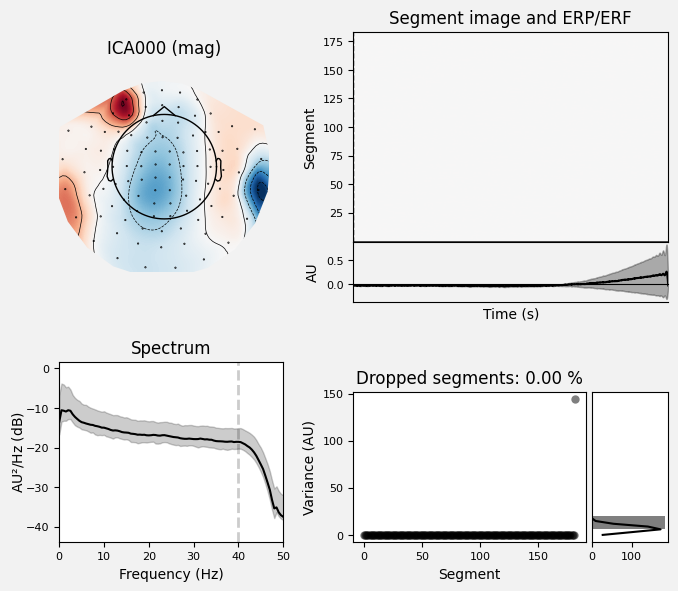

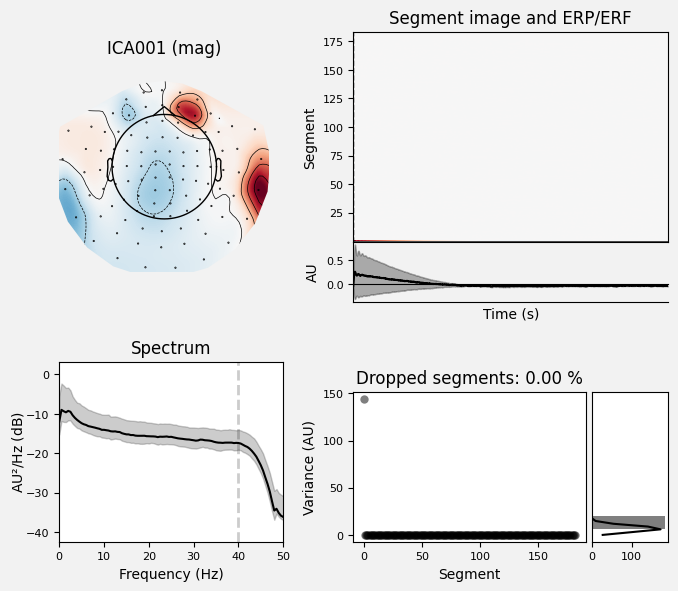

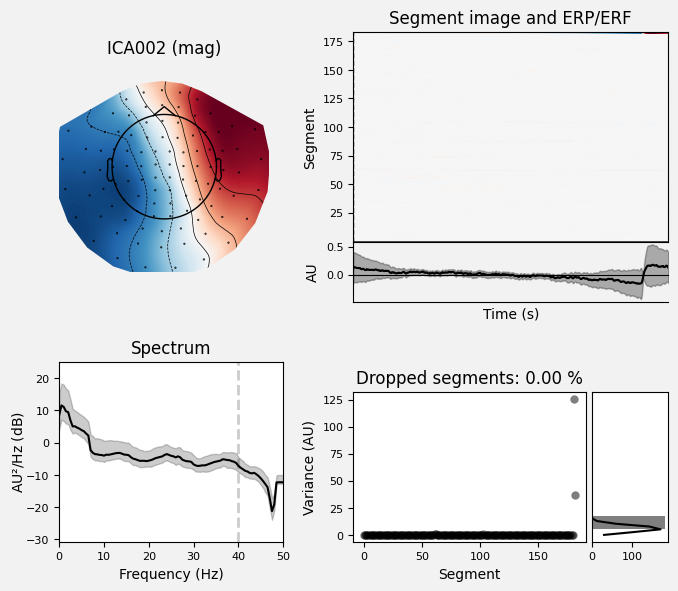

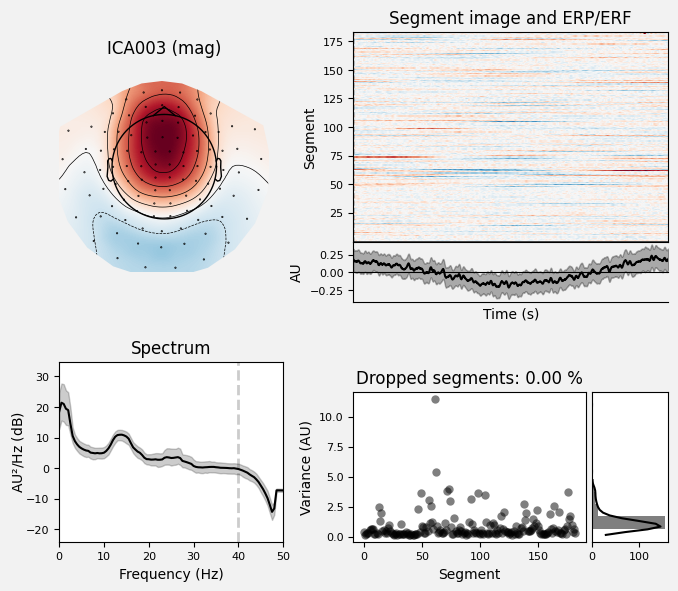

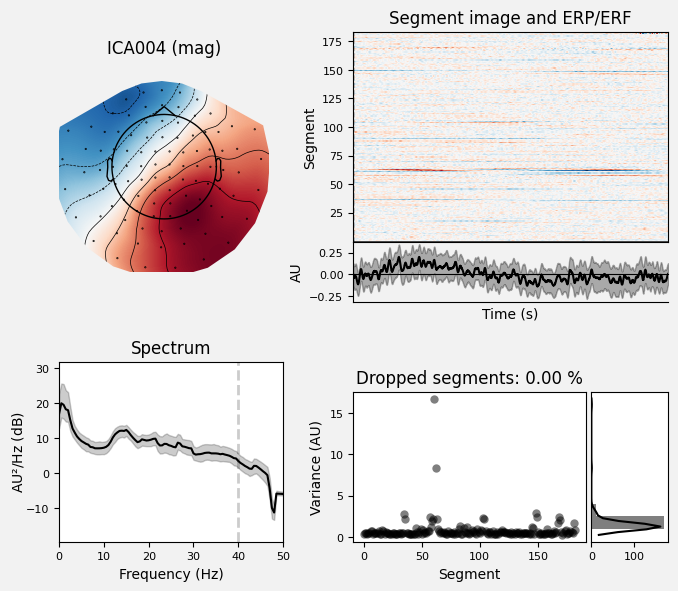

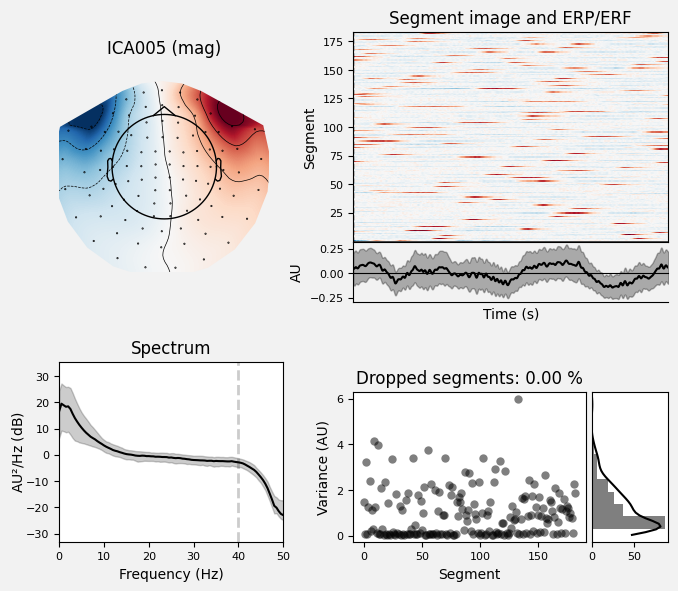

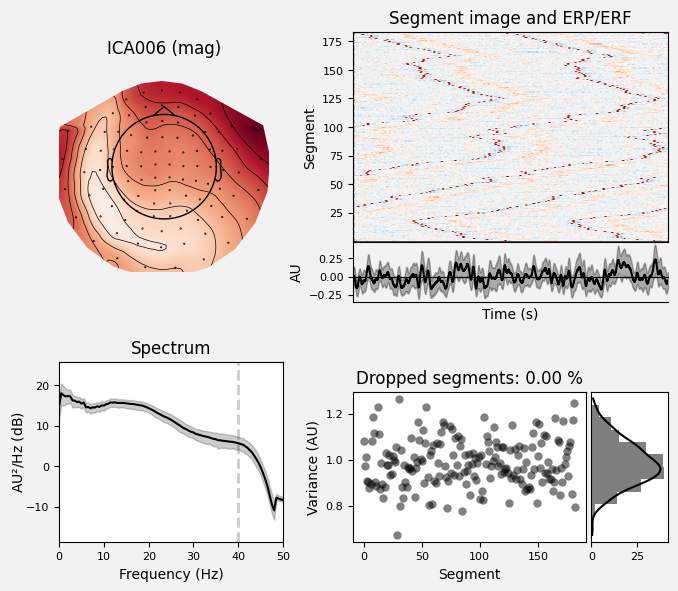

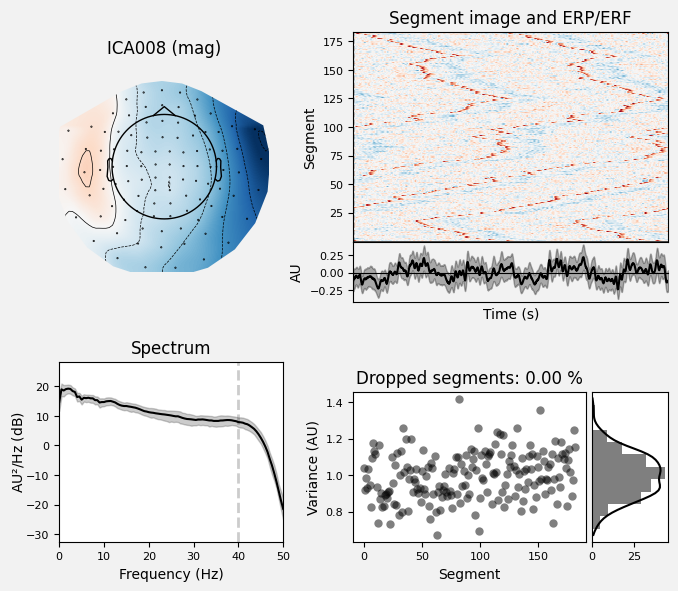

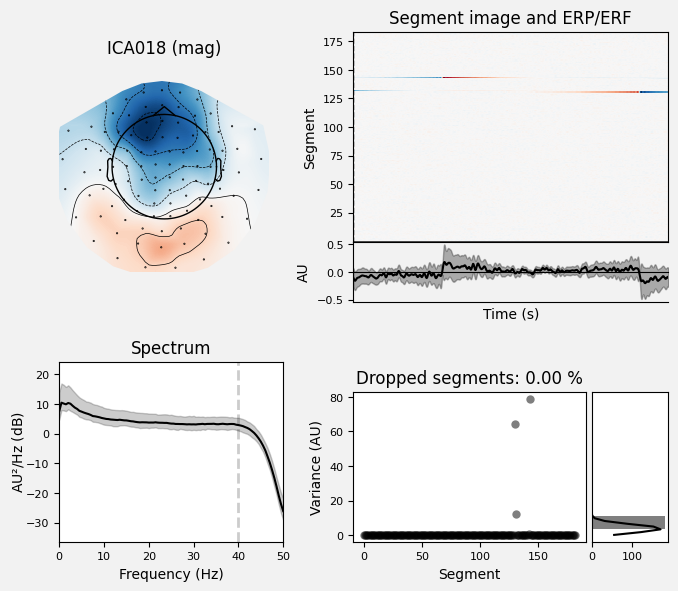

In [69]:
noise_components = [0,1,2,3,4,5,6,8,18]


# plot to check that you have the correct indices
ica.plot_properties(filt_raw, noise_components);

## SEND SUBJECT + RECORDING NAME AND INDICES OF NOISY COMPONENTS TO LAURA <33 Use below to print and copy

In [70]:
print(f"Subject: {subject}, recording: {recording_name}, noise components: {noise_components}")

Subject: 0113, recording: 001.self_block1, noise components: [0, 1, 2, 3, 4, 5, 6, 8, 18]
